In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ddim_20_pth = '/fastdata/users/nadavg/sd/qdiff/gen_stats/ddim_steps_20.pt'
ddim_50_pth = '/fastdata/users/nadavg/sd/qdiff/gen_stats/ddim_steps_50.pt'

In [4]:
ddim_20 = torch.load(ddim_20_pth)
ddim_50 = torch.load(ddim_50_pth)

/tmp/ipykernel_1677191/1647031419.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ddim_20 = torch.load(ddim_20_pth)
/tmp/ipykernel_1677191/1647031419.py:2: FutureWarning

In [5]:
k = list(ddim_20.keys())

In [6]:
len(k[12:])

12

In [7]:
len(k)#[0]

24

In [8]:
ddim_20[k[0]][0]['mean'].shape[-1]

4

In [9]:
def get_box_data(ddim,k,step):
    data = ddim[k]
    data = data[step]
    
    box_data = np.zeros((5, data['mean'].shape[-1]))
    box_data[0] = data['min'][0]
    box_data[4] = data['max'][0]
    box_data[2] = data['mean'][0]
    std = np.sqrt(data['var'])
    box_data[1] = data['mean'][0] - 0.6745*std
    box_data[3] = data['mean'][0] + 0.6745*std

    #box_data = box_data.T
    return box_data

        
    


In [10]:
box_data = get_box_data(ddim_20,k[0],15)

In [11]:
box_data.shape

(5, 4)

In [12]:
from mo_utils.utils.plot_aux import flatten

libtmux not installed ??


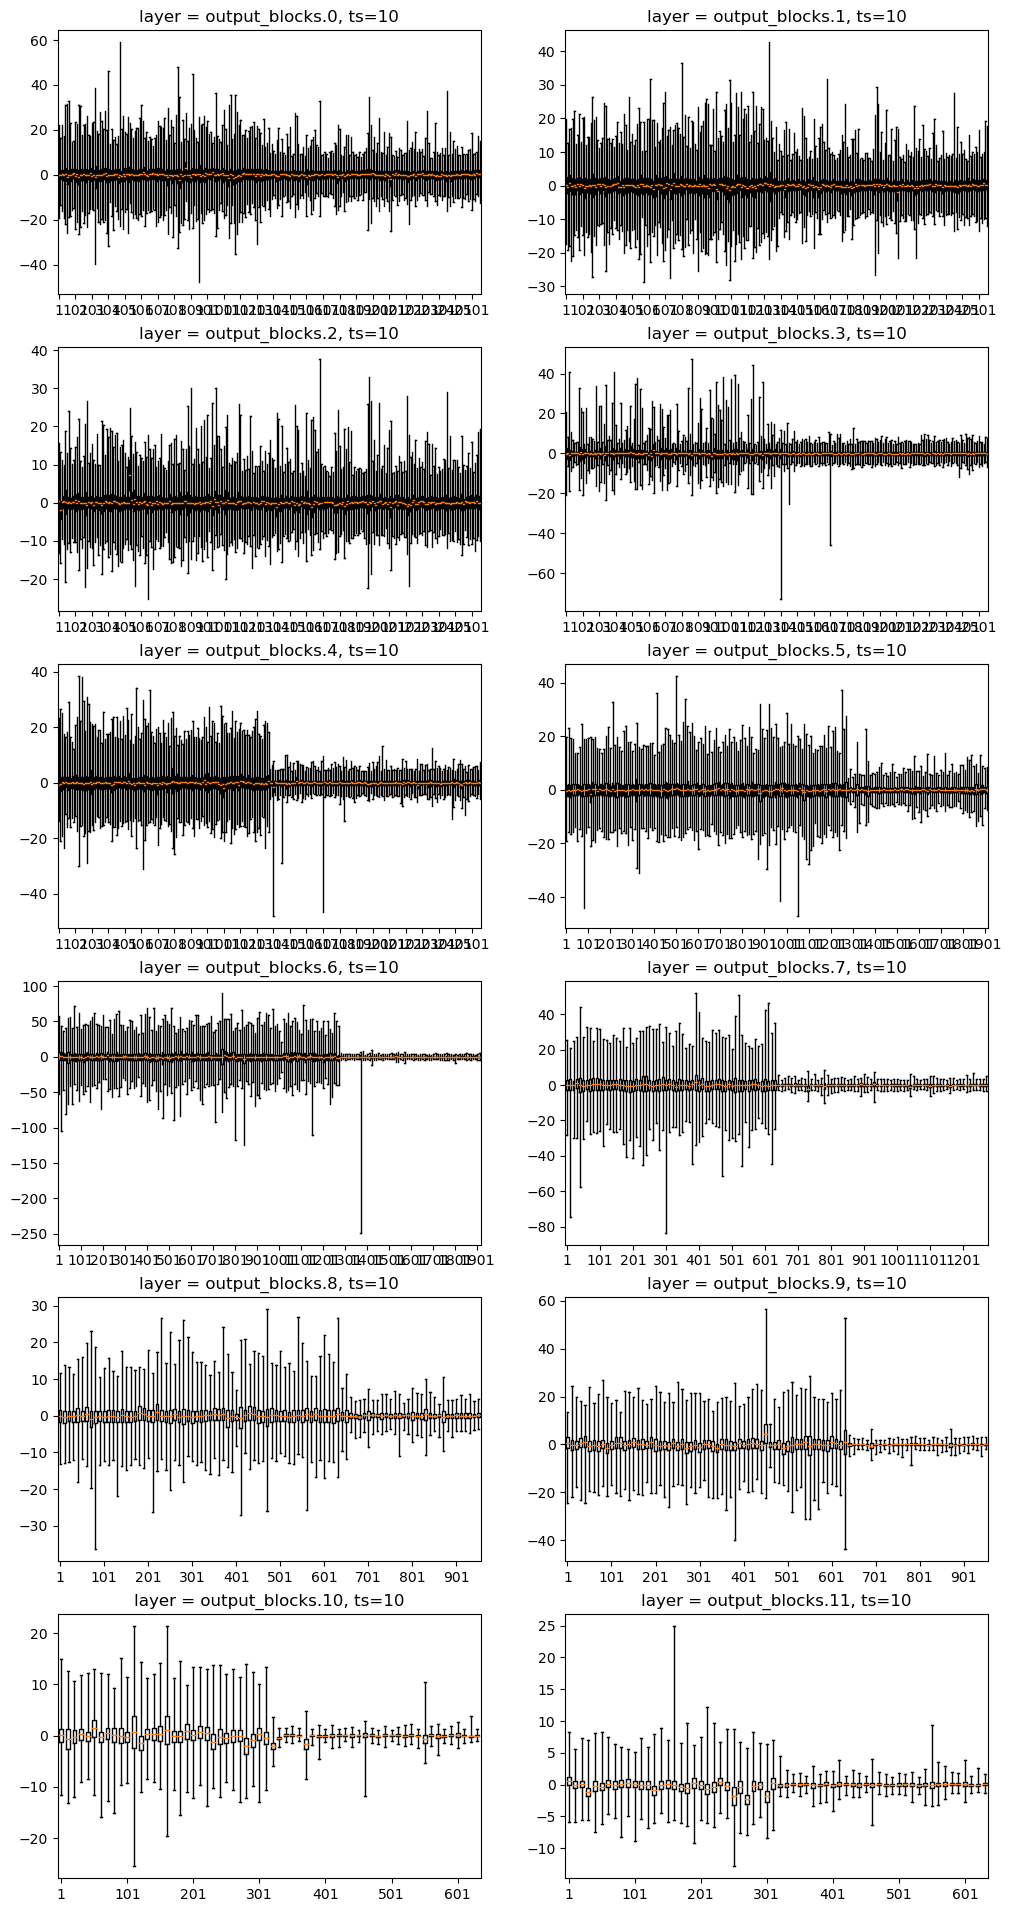

In [12]:
fig,ax = plt.subplots(6,2, figsize=(12, 4*6))
ax = flatten(ax)
#k_ind = 18; 
ts = 10
for ind in range(12):
    box_data = get_box_data(ddim_20,k[12+ind],ts)
    #box_data = get_box_data(ddim_50,k[k_ind],ts)
    #print(f'layer = {k[k_ind]}, {ts=}')

    channel_ind = list(range(1,box_data.shape[1]+1))
    if channel_ind[-1] > 100:
        channel_ind_sample = channel_ind[::10]
    box_data = box_data[:,channel_ind_sample]
    channel_ind_ticks = list(range(1,len(channel_ind_sample)))#[::10]

    #boxplot
    # Create a figure instance

    _=ax[ind].bxp([{'whislo': w[0], 'q1': w[1], 'med': w[2], 'q3': w[3], 'whishi': w[4]} for w in box_data.T], 
        showfliers=False, widths=0.6)
    #ax.set_xticklabels(list(range(box_data.shape[1])))
    #_=ax.set_xticks(channel_ind_sample[::10])
    #_=ax.set_xticklabels(channel_ind_sample[::10])
    _=ax[ind].set_xticks(channel_ind_ticks[::10])
    _=ax[ind].set_xticklabels(channel_ind_sample[::10])
    ax[ind].set_title(f'layer = {k[12+ind]}, {ts=}')



#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 


In [13]:
_=plt.plot(ddim_50[k[12+6]][ts]['var'].numpy()[0])
ddim_50[k[12+6]][ts]['var'].shape


NameError: name 'ts' is not defined

In [17]:
len(list(range(0,20,2)))

10

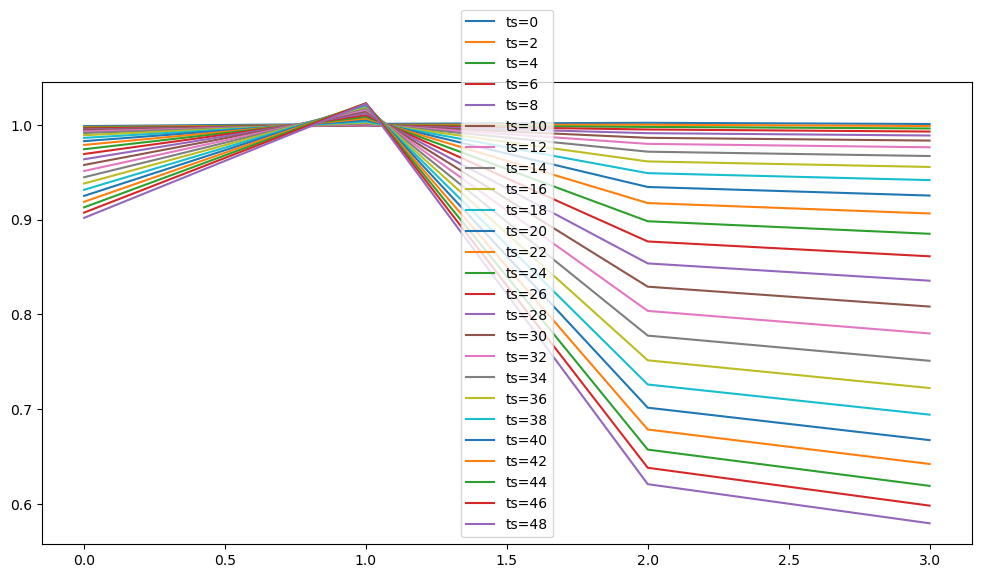

In [23]:
#fig,ax = plt.subplots(5,2, figsize=(12, 4*6))
fig,ax = plt.subplots(1,1, figsize=(12, 6))

#ax = flatten(ax)
#k_ind = 18; 
ts = 10
s = 0
for ind,ts in enumerate(range(0,50,2)):
    
    # box_data = get_box_data(ddim_20,k[12+ind],ts)
    # #box_data = get_box_data(ddim_50,k[k_ind],ts)
    # #print(f'layer = {k[k_ind]}, {ts=}')

    # channel_ind = list(range(1,box_data.shape[1]+1))
    # if channel_ind[-1] > 100:
    #     channel_ind_sample = channel_ind[::10]
    # box_data = box_data[:,channel_ind_sample]
    # channel_ind_ticks = list(range(1,len(channel_ind_sample)))#[::10]

    #boxplot
    # Create a figure instance

    # _=ax[ind].bxp([{'whislo': w[0], 'q1': w[1], 'med': w[2], 'q3': w[3], 'whishi': w[4]} for w in box_data.T], 
    #     showfliers=False, widths=0.6)
    
    _=ax.plot(ddim_50[k[0]][ts]['var'].numpy()[0], label=f'{ts=}')#, color='r')
    #_=ax[ind].plot(ddim_50[k[s+ind]][ts+25]['var'].numpy()[0], label='50+', color='b')
    #_=ax[ind].plot(ddim_50[k[s+ind]][ts+25]['var'].numpy()[0], label='50+', color='b')

    #_=ax[ind].plot(ddim_20[k[12+ind]][ts]['mean'].numpy()[0], label='var_20', color='r')
    #_=ax[ind].plot(ddim_50[k[12+ind]][ts+20]['mean'].numpy()[0], label='var_50', color='b')
    ax.legend()
    #ax.set_xticklabels(list(range(box_data.shape[1])))
    #_=ax.set_xticks(channel_ind_sample[::10])
    #_=ax.set_xticklabels(channel_ind_sample[::10])
    #_=ax[ind].set_xticks(channel_ind_ticks[::10])
    #_=ax[ind].set_xticklabels(channel_ind_sample[::10])
    #ax[ind].set_title(f'layer = {k[s+ind]}, {ts=}')



#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 


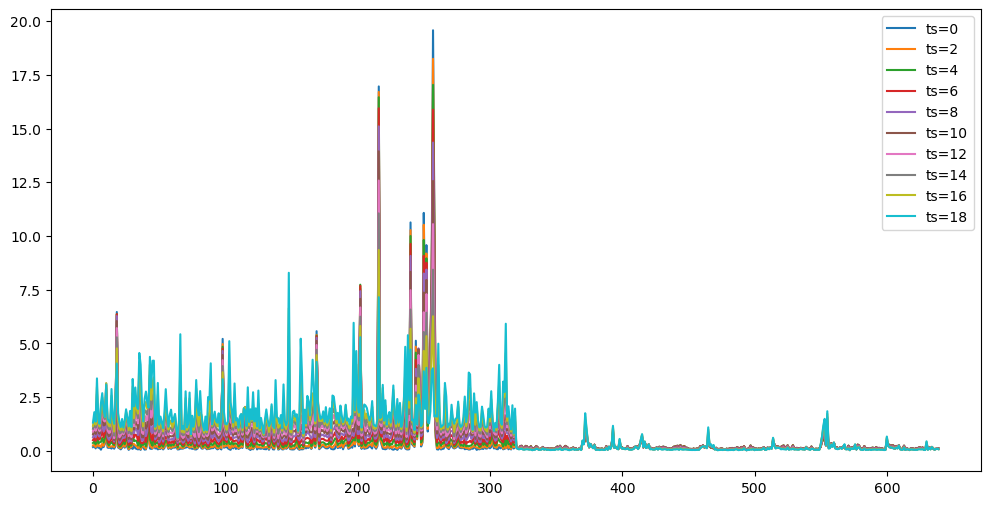

In [25]:
#fig,ax = plt.subplots(5,2, figsize=(12, 4*6))
fig,ax = plt.subplots(1,1, figsize=(12, 6))

#ax = flatten(ax)
#k_ind = 18; 
ts = 10
s = 0
for ind,ts in enumerate(range(0,20,2)):
    
    # box_data = get_box_data(ddim_20,k[12+ind],ts)
    # #box_data = get_box_data(ddim_50,k[k_ind],ts)
    # #print(f'layer = {k[k_ind]}, {ts=}')

    # channel_ind = list(range(1,box_data.shape[1]+1))
    # if channel_ind[-1] > 100:
    #     channel_ind_sample = channel_ind[::10]
    # box_data = box_data[:,channel_ind_sample]
    # channel_ind_ticks = list(range(1,len(channel_ind_sample)))#[::10]

    #boxplot
    # Create a figure instance

    # _=ax[ind].bxp([{'whislo': w[0], 'q1': w[1], 'med': w[2], 'q3': w[3], 'whishi': w[4]} for w in box_data.T], 
    #     showfliers=False, widths=0.6)
    
    _=ax.plot(ddim_20[k[-1]][ts]['var'].numpy()[0], label=f'{ts=}')#, color='r')
    #_=ax[ind].plot(ddim_50[k[s+ind]][ts+25]['var'].numpy()[0], label='50+', color='b')
    #_=ax[ind].plot(ddim_50[k[s+ind]][ts+25]['var'].numpy()[0], label='50+', color='b')

    #_=ax[ind].plot(ddim_20[k[12+ind]][ts]['mean'].numpy()[0], label='var_20', color='r')
    #_=ax[ind].plot(ddim_50[k[12+ind]][ts+20]['mean'].numpy()[0], label='var_50', color='b')
    ax.legend()
    #ax.set_xticklabels(list(range(box_data.shape[1])))
    #_=ax.set_xticks(channel_ind_sample[::10])
    #_=ax.set_xticklabels(channel_ind_sample[::10])
    #_=ax[ind].set_xticks(channel_ind_ticks[::10])
    #_=ax[ind].set_xticklabels(channel_ind_sample[::10])
    #ax[ind].set_title(f'layer = {k[s+ind]}, {ts=}')



#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 


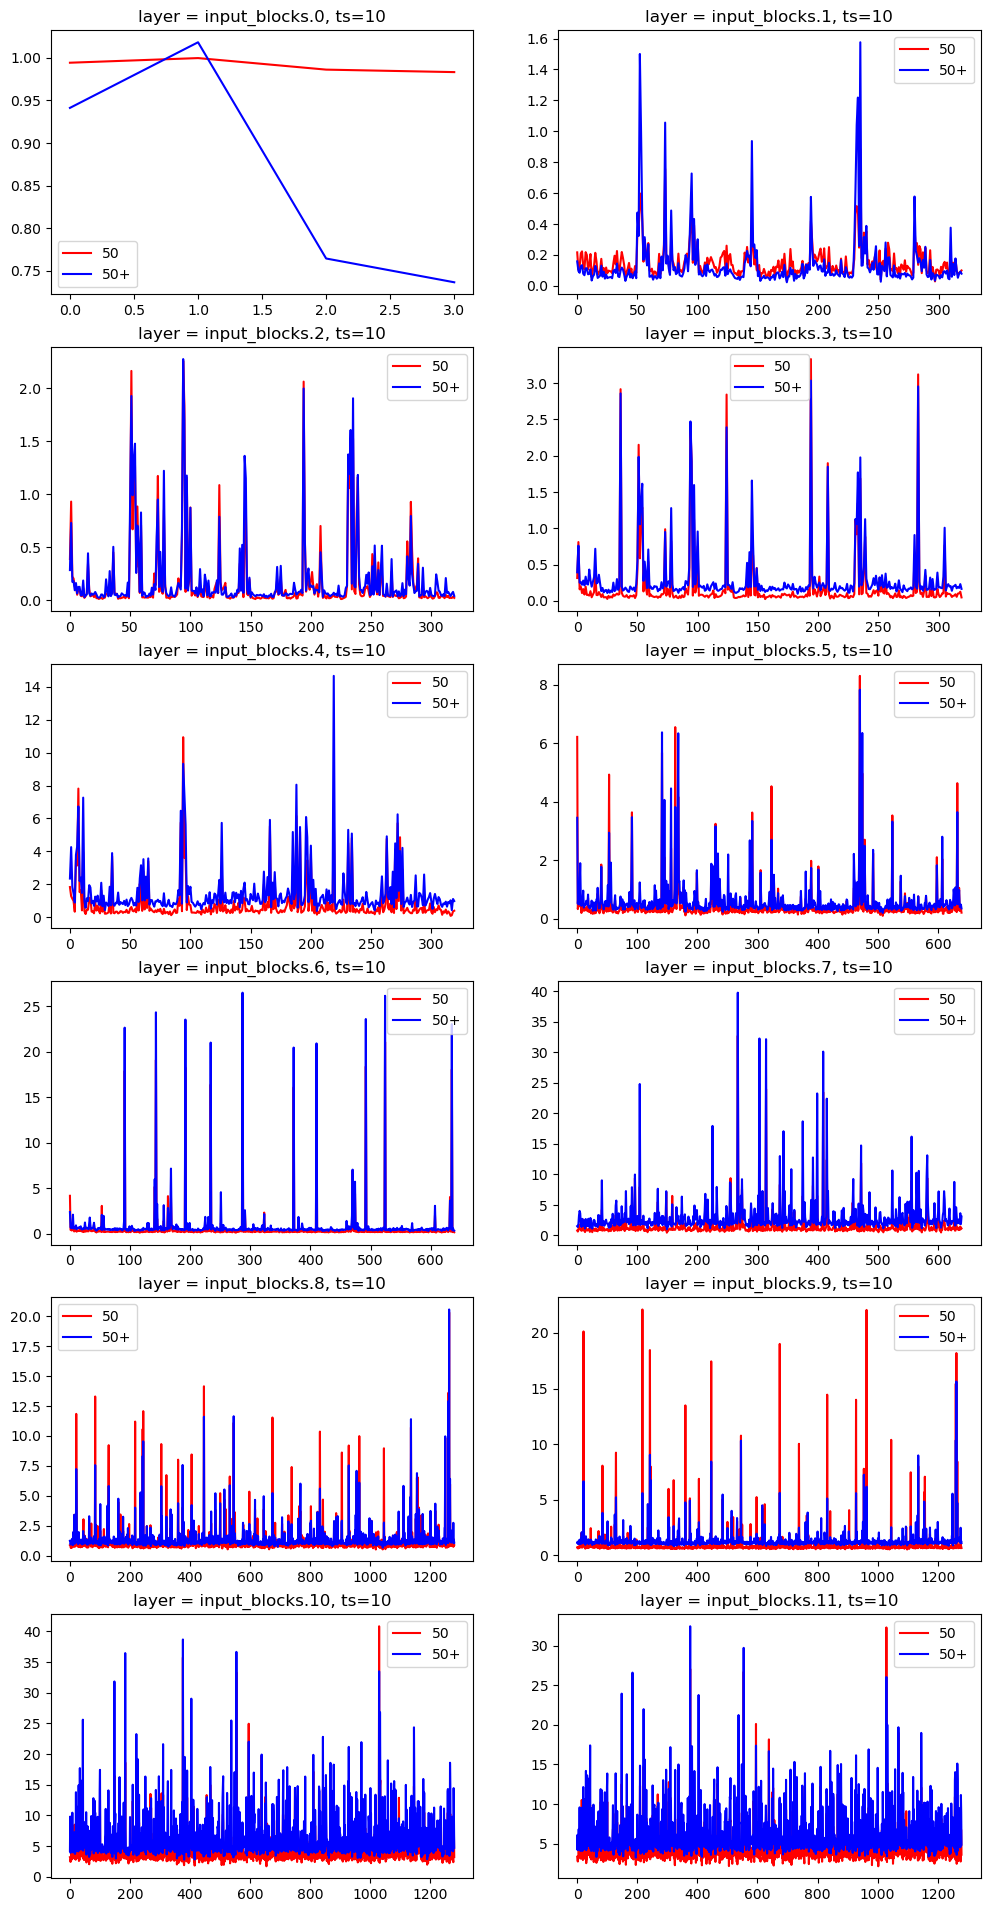

In [ ]:
fig,ax = plt.subplots(6,2, figsize=(12, 4*6))
ax = flatten(ax)
#k_ind = 18; 
ts = 10
s = 0
for ind in range(12):
    
    # box_data = get_box_data(ddim_20,k[12+ind],ts)
    # #box_data = get_box_data(ddim_50,k[k_ind],ts)
    # #print(f'layer = {k[k_ind]}, {ts=}')

    # channel_ind = list(range(1,box_data.shape[1]+1))
    # if channel_ind[-1] > 100:
    #     channel_ind_sample = channel_ind[::10]
    # box_data = box_data[:,channel_ind_sample]
    # channel_ind_ticks = list(range(1,len(channel_ind_sample)))#[::10]

    #boxplot
    # Create a figure instance

    # _=ax[ind].bxp([{'whislo': w[0], 'q1': w[1], 'med': w[2], 'q3': w[3], 'whishi': w[4]} for w in box_data.T], 
    #     showfliers=False, widths=0.6)
    
    _=ax[ind].plot(ddim_50[k[s+ind]][ts]['var'].numpy()[0], label='50', color='r')
    _=ax[ind].plot(ddim_50[k[s+ind]][ts+25]['var'].numpy()[0], label='50+', color='b')
    _=ax[ind].plot(ddim_50[k[s+ind]][ts+25]['var'].numpy()[0], label='50+', color='b')

    #_=ax[ind].plot(ddim_20[k[12+ind]][ts]['mean'].numpy()[0], label='var_20', color='r')
    #_=ax[ind].plot(ddim_50[k[12+ind]][ts+20]['mean'].numpy()[0], label='var_50', color='b')
    ax[ind].legend()
    #ax.set_xticklabels(list(range(box_data.shape[1])))
    #_=ax.set_xticks(channel_ind_sample[::10])
    #_=ax.set_xticklabels(channel_ind_sample[::10])
    #_=ax[ind].set_xticks(channel_ind_ticks[::10])
    #_=ax[ind].set_xticklabels(channel_ind_sample[::10])
    ax[ind].set_title(f'layer = {k[s+ind]}, {ts=}')



#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 


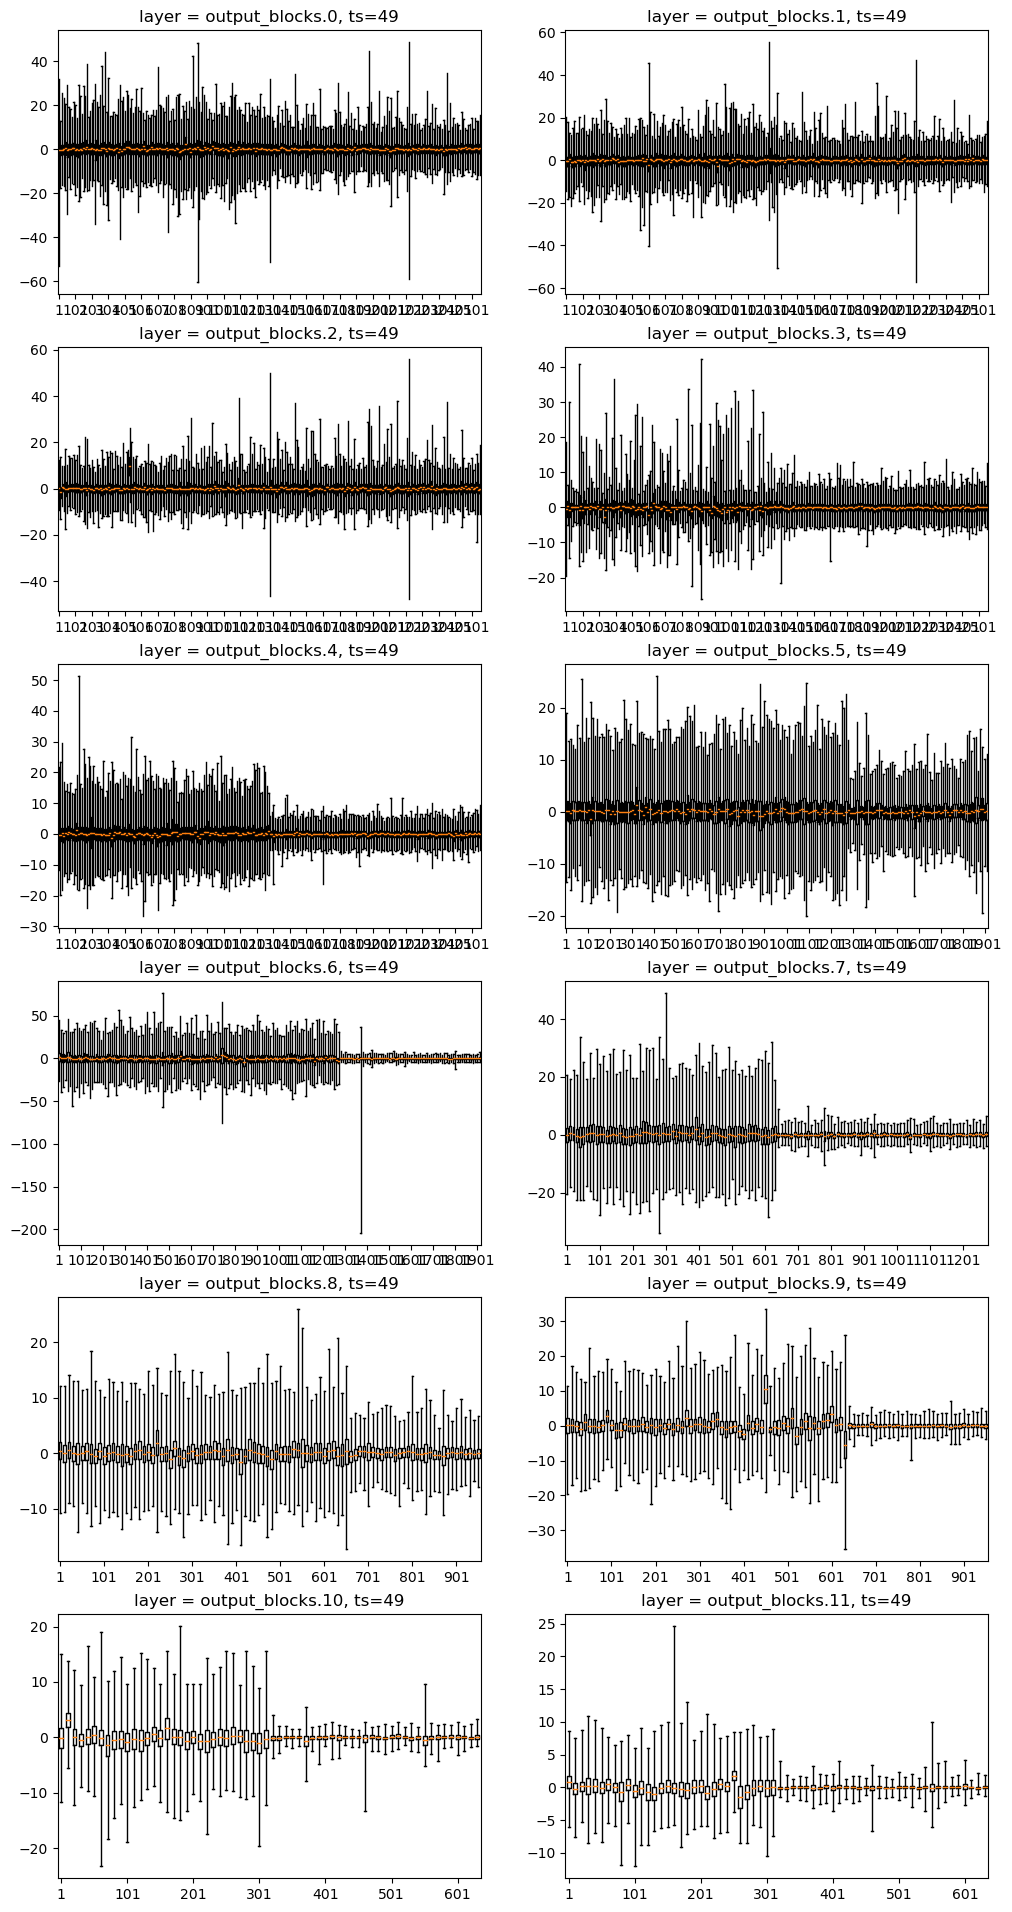

In [144]:
fig,ax = plt.subplots(6,2, figsize=(12, 4*6))
ax = flatten(ax)
#k_ind = 18; 
ts = 49
for ind in range(12):
    box_data = get_box_data(ddim_50,k[12+ind],ts)
    #box_data = get_box_data(ddim_50,k[k_ind],ts)
    #print(f'layer = {k[k_ind]}, {ts=}')

    channel_ind = list(range(1,box_data.shape[1]+1))
    if channel_ind[-1] > 100:
        channel_ind_sample = channel_ind[::10]
    box_data = box_data[:,channel_ind_sample]
    channel_ind_ticks = list(range(1,len(channel_ind_sample)))#[::10]

    #boxplot
    # Create a figure instance

    _=ax[ind].bxp([{'whislo': w[0], 'q1': w[1], 'med': w[2], 'q3': w[3], 'whishi': w[4]} for w in box_data.T], 
        showfliers=False, widths=0.6)
    #ax.set_xticklabels(list(range(box_data.shape[1])))
    #_=ax.set_xticks(channel_ind_sample[::10])
    #_=ax.set_xticklabels(channel_ind_sample[::10])
    _=ax[ind].set_xticks(channel_ind_ticks[::10])
    _=ax[ind].set_xticklabels(channel_ind_sample[::10])
    ax[ind].set_title(f'layer = {k[12+ind]}, {ts=}')



#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 


In [13]:
box_data

array([[-5.80973101e+00, -5.80274487e+00, -5.57805109e+00,
        -5.62320042e+00, -7.50139904e+00, -6.13507080e+00,
        -4.67514706e+00, -5.20543194e+00, -8.27889729e+00,
        -4.97415352e+00, -8.89221954e+00, -5.37387562e+00,
        -6.74321842e+00, -6.08082581e+00, -4.53290749e+00,
        -5.85486794e+00, -5.54632664e+00, -6.06975842e+00,
        -6.42679405e+00, -9.21387291e+00, -5.58562088e+00,
        -5.96610069e+00, -6.59594059e+00, -4.49706459e+00,
        -5.28039742e+00, -1.28374805e+01, -7.54820728e+00,
        -7.87449932e+00, -6.25293684e+00, -5.10002565e+00,
        -8.32225609e+00, -7.12362671e+00, -1.80918527e+00,
        -1.95415032e+00, -1.21702266e+00, -1.85700178e+00,
        -1.32734632e+00, -3.34761262e+00, -2.91104460e+00,
        -2.74011064e+00, -4.18749380e+00, -2.25604606e+00,
        -1.59195197e+00, -1.92524481e+00, -1.96436071e+00,
        -1.18197870e+00, -6.32196617e+00, -1.47465813e+00,
        -1.79468596e+00, -1.52431548e+00, -1.48909891e+0

layer = output_blocks.6, ts=0


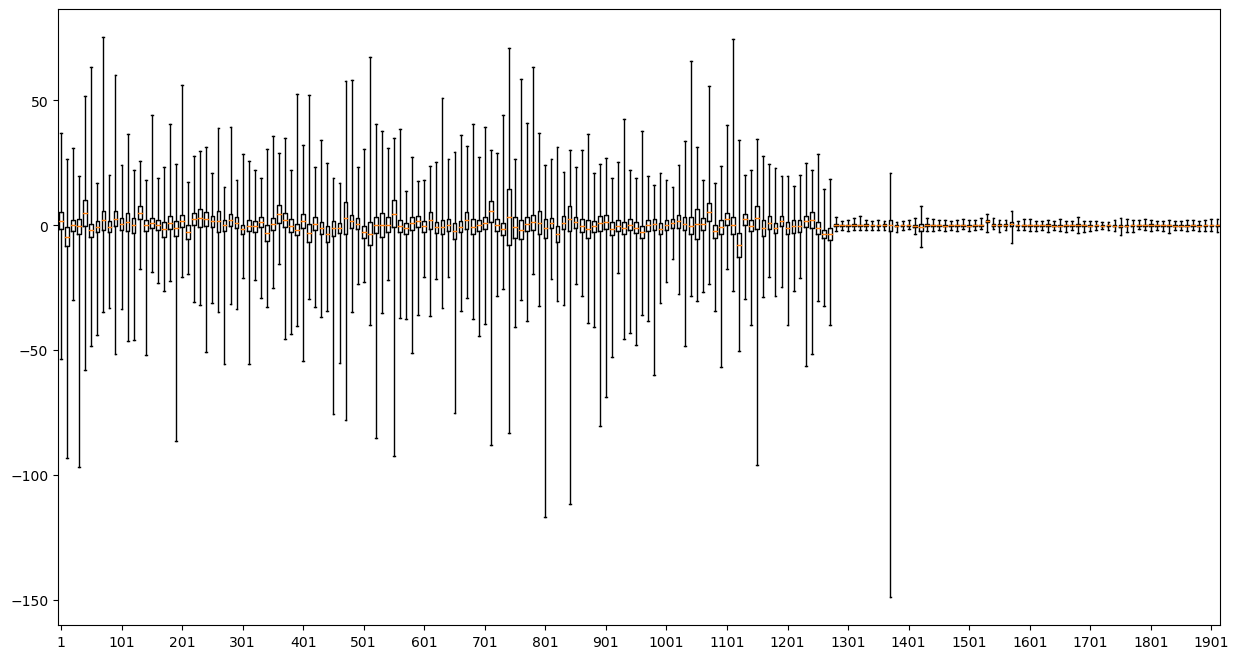

In [ ]:
k_ind = 18; ts = 0
box_data = get_box_data(ddim_20,k[k_ind],ts)
#box_data = get_box_data(ddim_50,k[k_ind],ts)
print(f'layer = {k[k_ind]}, {ts=}')

channel_ind = list(range(1,box_data.shape[1]+1))
if channel_ind[-1] > 100:
    channel_ind_sample = channel_ind[::10]
box_data = box_data[:,channel_ind_sample]
channel_ind_ticks = list(range(1,len(channel_ind_sample)))#[::10]

#boxplot
# Create a figure instance
fig,ax = plt.subplots(1,1, figsize=(15, 8))
_=ax.bxp([{'whislo': w[0], 'q1': w[1], 'med': w[2], 'q3': w[3], 'whishi': w[4]} for w in box_data.T], 
       showfliers=False, widths=0.6)
#ax.set_xticklabels(list(range(box_data.shape[1])))
#_=ax.set_xticks(channel_ind_sample[::10])
#_=ax.set_xticklabels(channel_ind_sample[::10])
_=ax.set_xticks(channel_ind_ticks[::10])
_=ax.set_xticklabels(channel_ind_sample[::10])



#plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 
